# Uber Supply and Demand Case Study

### Project Description:

This project appeared in the Uber interviews. It provides with a dataset and eleven questions we must answer using EDA. Some of the tasks we’ll perform are:

* Forward filling empty data
* Data aggregation
* List item
* Create timestamps
* Calculate rolling sums
* Parse time interval
* Calculate the percentage
* Calculate the percentage
* Visualize data
* Find minimums and maximums

###  Dataset : uber dataset.csv

DailyUber provides the 2016 data. By using this data find out the demand and supply Analysis gap of the cab. 
The main objective of this project is to analyse the data on Uber Request data. Through the analysis of data,

### key Columns Explained:

Date: The date of the record (format: YYYY-MM-DD).

Time (Local): The hour of the day in local time (0-23).

Eyeballs: Number of people who opened the Uber app during that hour.

Zeroes: Number of people who saw zero cars available.

Completed Trips: Number of trips completed successfully.

Requests: Number of ride requests made.

Unique Drivers: Number of drivers logged in during that hour.

### What are the insights we find?

1.Which date had the most completed trips during the two weeks?

2.What was the highest number of completed trips within a 24-hour period?

3.Which hour of the day had the most requests during the two-week period?

4.What percentages of all zeroes during the two week period occurred on weekends (Friday at 5 pm to Sunday at 3 am)?

5.What is the weighted average ratio of completed trips per driver during the two week period?

6.In drafting a driver schedule in terms of 8 hour shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts every 8 hours. Assume that a driver will work the same shift each day.

7.True or False: Driver supply always increases when demand increases during the two week period.

8.In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

9.If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to?

10.True or False: There is exactly two weeks of data in this analysis

11.Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums)

## Step 1: Load and Inspect the Data

Let's start by loading the dataset and inspecting its structure.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
uber = pd.read_csv(r'C:\Users\purva\Downloads\uber dataset.csv')
# Display the first few rows
print(uber.head())

        Date  Time (Local)  Eyeballs   Zeroes   Completed Trips   Requests   \
0  10-Sep-12             7          5        0                 2          2   
1  10-Sep-12             8          6        0                 2          2   
2  10-Sep-12             9          8        3                 0          0   
3  10-Sep-12            10          9        2                 0          1   
4  10-Sep-12            11         11        1                 4          4   

   Unique Drivers  
0               9  
1              14  
2              14  
3              14  
4              11  


In [3]:
# Check data types and missing values
print(uber.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              336 non-null    object
 1   Time (Local)      336 non-null    int64 
 2   Eyeballs          336 non-null    int64 
 3   Zeroes            336 non-null    int64 
 4   Completed Trips   336 non-null    int64 
 5   Requests          336 non-null    int64 
 6   Unique Drivers    336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB
None


In [4]:
uber.describe()

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
count,336.00000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,11.50000,19.901786,4.252976,4.062500,5.529762,7.895833
std,6.93251,16.902862,5.795391,5.672581,7.399416,5.884296
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.75000,9.000000,1.000000,0.000000,1.000000,3.000000
50%,11.50000,17.000000,3.000000,2.000000,3.000000,8.000000
75%,17.25000,25.000000,5.000000,5.000000,6.250000,11.000000
max,23.00000,99.000000,59.000000,36.000000,46.000000,30.000000


## Step 2: Preprocessing
* Convert the Date column to datetime.
* Check for any missing or inconsistent data.
* Create any additional columns needed (e.g., datetime combining date and hour).

In [5]:
# Convert Date to datetime
uber['Date'] = pd.to_datetime(uber['Date'])
# Create a datetime column combining Date and Time (Local)
uber['DateTime'] = uber.apply(lambda row: row['Date'] + pd.Timedelta(hours=row['Time (Local)']), axis=1)
# Check for missing values
print(uber.isnull().sum())

Date                0
Time (Local)        0
Eyeballs            0
Zeroes              0
Completed Trips     0
Requests            0
Unique Drivers      0
DateTime            0
dtype: int64


In [6]:
uber.columns = uber.columns.str.strip()
uber.columns

Index(['Date', 'Time (Local)', 'Eyeballs', 'Zeroes', 'Completed Trips',
       'Requests', 'Unique Drivers', 'DateTime'],
      dtype='object')

### App Openings (Eyeballs) - Customers opening the app looking for drivers

In [7]:
uber_eyeballs = uber.groupby('Date')['Eyeballs'].sum()
uber_eyeballs

Date
2012-09-10    189
2012-09-11    314
2012-09-12    423
2012-09-13    325
2012-09-14    549
2012-09-15    788
2012-09-16    426
2012-09-17    377
2012-09-18    342
2012-09-19    319
2012-09-20    375
2012-09-21    740
2012-09-22    960
2012-09-23    526
2012-09-24     34
Name: Eyeballs, dtype: int64

### Zeros - No: of customers who open the app but find no cars in the area

In [8]:
no_car = uber.groupby('Date')['Zeroes'].sum()
print('Unavailable car')
no_car

Unavailable car


Date
2012-09-10     26
2012-09-11     64
2012-09-12     55
2012-09-13     80
2012-09-14     92
2012-09-15    258
2012-09-16     93
2012-09-17     76
2012-09-18     94
2012-09-19     46
2012-09-20     68
2012-09-21    124
2012-09-22    219
2012-09-23    115
2012-09-24     19
Name: Zeroes, dtype: int64

## Step 3: Answer Questions

### Question 1: Which date had the most completed trips during the two week period?

To answer this question, we need to group the data by date and calculate the sum of completed trips for each date.

In [9]:
trips_per_day = uber.groupby('Date')['Completed Trips'].sum()

date_max_trips = trips_per_day.idxmax()
max_trips = trips_per_day.max()

print(f'{date_max_trips.date()} with {max_trips} trips has the most number of trips in the two week period')

2012-09-22 with 248 trips has the most number of trips in the two week period


### Question 2: What was the highest number of completed trips within a 24-hour period?

To answer this question, we need to calculate the rolling sum of completed trips for each hour. Since data is hourly, sum over each date.

In [10]:
uber_date = uber.sort_values(by='Date')
rolling_completed = uber_date.rolling('24H', on='Date')['Completed Trips'].sum()
max_rolling_trips = rolling_completed.max()

print(f'The highest number of completed trips within a 24-hour period is {max_rolling_trips} trips.')

The highest number of completed trips within a 24-hour period is 248.0 trips.


### Question 3: Which hour of the day had the most requests during the two-week period?

To answer this question, we need to group the data by hour and calculate the sum of requests for each hour.
* Sum requests by hour (0-23) across all days.

In [11]:
Hours =uber.groupby('Time (Local)')['Requests'].sum()

max_request_hour =Hours.idxmax()
c=Hours.max()
print(f'Most requests during the two weeks peroid is at hour={max_request_hour} with {c}  requests.')

Most requests during the two weeks peroid is at hour=23 with 184  requests.


### Question 4: What percentages of all zeroes during the two week period occurred on weekends (Friday at 5 pm to Sunday at 3 am)?

To answer this question, we need to filter the data for weekend hours and 
* Define weekend period: Friday 17:00 to Sunday 03:00.
* Calculate total zeroes and zeroes in weekend period.
* calculate the percentage of zeroes.

In [12]:
weekend_data = uber[((uber['Date'].dt.dayofweek == 4) & (uber['Time (Local)'] >= 17)) |
                   (uber['Date'].dt.dayofweek == 5) |
                   ((uber['Date'].dt.dayofweek == 6) & (uber['Time (Local)'] < 3))]
weekend_data

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,DateTime
106,2012-09-14,17,34,4,3,5,13,2012-09-14 17:00:00
107,2012-09-14,18,40,2,8,9,14,2012-09-14 18:00:00
108,2012-09-14,19,46,6,9,10,15,2012-09-14 19:00:00
109,2012-09-14,20,38,4,8,9,14,2012-09-14 20:00:00
110,2012-09-14,21,49,6,8,9,17,2012-09-14 21:00:00
...,...,...,...,...,...,...,...,...
303,2012-09-22,22,77,11,25,33,19,2012-09-22 22:00:00
304,2012-09-22,23,99,59,25,44,17,2012-09-22 23:00:00
305,2012-09-23,0,62,25,23,32,18,2012-09-23 00:00:00
306,2012-09-23,1,38,1,15,23,18,2012-09-23 01:00:00


In [13]:
# count the total zeroes during two-week duration
total_zeroes = uber['Zeroes'].sum()

# count the weekend zeroes (friday 5 pm to sunday 3 am)
weekend_zeroes = weekend_data['Zeroes'].sum()

# calculate % of zeroes on weekend
percentage_weekend_zeroes = (weekend_zeroes/total_zeroes)*100
print(f'The percentage of uber users to were unable to find a car in their area during weekends was {percentage_weekend_zeroes:.2f}%')

The percentage of uber users to were unable to find a car in their area during weekends was 44.86%


### Question 5: What is the weighted average ratio of completed trips per driver during the two week period?


To answer this question, we need to calculate the weighted average ratio of completed trips per driver.
* Ratio per hour = Completed Trips / Unique Drivers
* Weighted average = sum of (ratio * completed trips) / total completed trips

In [14]:
hourly_trips = uber.groupby('Time (Local)')['Completed Trips'].sum().reset_index()

hourly_unique_drivers = uber.groupby('Time (Local)')['Unique Drivers'].sum().reset_index()

hourly_ratio_trips_drivers = hourly_trips['Completed Trips']/hourly_unique_drivers['Unique Drivers']
weighted_completed_trips = (hourly_ratio_trips_drivers * (uber.groupby('Time (Local)')['Completed Trips'].sum()))

total_weighted_completed_trips = weighted_completed_trips.sum()

total_completed_trips = uber['Completed Trips'].sum()

weighted_avg_trips_driver = total_weighted_completed_trips/total_completed_trips
print(f'The weighted average ratio of completed trips per driver during the 2 weeks period is {weighted_avg_trips_driver:.2f}')

The weighted average ratio of completed trips per driver during the 2 weeks period is 0.63


### Question 6: In drafting a driver schedule in terms of 8 hour shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts every 8 hours. Assume that a driver will work the same shift each day.

To answer this question, we need to calculate the rolling sum of unique requests for each 8-hour shift
* Shifts start every 8 hours: 0, 8, 16.
* For each shift, sum unique requests over all days and hours in that shift.
* Find the shift with the highest total unique requests

In [15]:
# no: of unique requests each hour
hourly_unique_requests = uber.groupby('Time (Local)')['Requests'].nunique()
# window of 8 hours across the hours to find the 8 consecutive hours with the highest number of unique requests.
busiest_8hours_start = hourly_unique_requests.rolling(window = 8).sum().idxmax()

#convert start hours to time stamp
busiest_8hours_start = pd.Timestamp(busiest_8hours_start*3600000000000) # convert hours to nano seconds
busiest_8hours_end = busiest_8hours_start + pd.Timedelta(hours = 8)
print(f'The busiest 8-hour period in the two weeks period is {busiest_8hours_start.time()} to {busiest_8hours_end.time()} hours')

The busiest 8-hour period in the two weeks period is 22:00:00 to 06:00:00 hours


### Question 7: True or False: Driver supply always increases when demand increases during the two week period.

To answer this question, we need to visualize the data to confirm the relationship between driver supply and demand.
* Demand can be approximated by Requests or Eyeballs.
* Supply is Unique Drivers.
* Check if supply always increases when demand increases hour to hour.

In [16]:
# let's calculate trip demand and driver supply by grouping on date
demand_supply = uber.groupby('Date').agg({'Requests':'sum', 'Unique Drivers':'sum'})
demand_supply = demand_supply.reset_index()
demand_supply

,Date,Requests,Unique Drivers
0,2012-09-10,34,138
1,2012-09-11,52,132
2,2012-09-12,114,201
3,2012-09-13,67,159
4,2012-09-14,137,211
5,2012-09-15,282,193
6,2012-09-16,118,150
7,2012-09-17,78,164
8,2012-09-18,81,134
9,2012-09-19,54,186


In [17]:
# check if driver supply increases when demand increase
# it checks if the difference between consective elements and if not greater than 0 return false
increase_supply = (demand_supply['Unique Drivers'].diff() > 0) & (demand_supply['Requests'].diff() > 0)
# all() function checks if the supply of drivers increase in each of demand of requests increase
supply_increase_with_demand = increase_supply.all()
print(supply_increase_with_demand)
print('The demand for uber requests does not guranatee an increase in the supply of drivers')

False
The demand for uber requests does not guranatee an increase in the supply of drivers


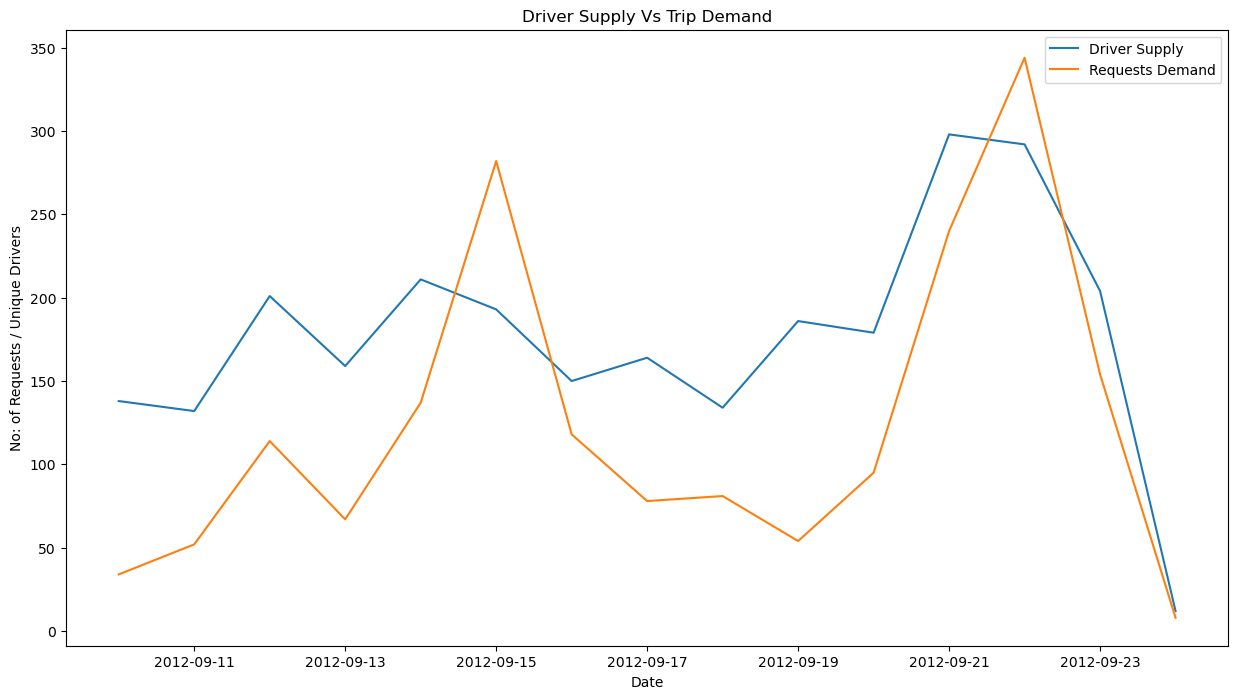

In [18]:
# plot the driver supply on each day
plt.figure(figsize = (15,8))
plt.plot(demand_supply['Date'], demand_supply['Unique Drivers'], label = 'Driver Supply')
# plot the requests demand on each day
plt.plot(demand_supply['Date'], demand_supply['Requests'], label = 'Requests Demand')
plt.xlabel('Date')
plt.ylabel('No: of Requests / Unique Drivers')
plt.legend()
plt.title('Driver Supply Vs Trip Demand')
plt.show()

From the above line chart we can understand that driver supply was not always increase as the demand increase. There might be various reasons for this, some drivers might choose not to work during peak demand times, or there might be external factors that affect driver availability (such as traffic, weather conditions, or events in the city). To confirm this, we would need to analyze the data and identify instances where demand increased but driver supply did not.

### Question 8: In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

To answer this question, we need to calculate the rolling ratio of zeroes to eyeballs for each 72-hour period.
* Calculate rolling 72-hour windows.
* For each window, sum Zeroes and Eyeballs, compute ratio.
* Find window with highest ratio.

In [19]:
# add new column 72 hour period
uber['72 Hour Period'] = pd.to_datetime(uber['Date']).dt.floor('72H')
# group the data by 72 hour period and calculate the zeros to eyeballs ratio for each period
period_ratios = uber.groupby('72 Hour Period').apply(lambda x: (x['Zeroes']/x['Eyeballs']).mean())

# find period with highest ratio
period_with_highest_ratio = period_ratios.idxmax()
period_with_highest_ratio = period_with_highest_ratio.date()
higest_ratio = period_ratios.max()

print(f'The 72-hour period with highest Zeroes to Eyeballs ratio is on {period_with_highest_ratio} with a ratio of {higest_ratio:.2f}')

The 72-hour period with highest Zeroes to Eyeballs ratio is on 2012-09-23 with a ratio of 0.35


### Question 9: if you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to?

To answer this question, we need to
* Consider both rider eyeballs and driver supply.
* Intuition: Add drivers where demand (eyeballs) is high but supply is low.
* Calculate ratio Eyeballs / Unique Drivers per hour of day.
* Choose hour with highest ratio.

In [20]:
# each hour requested trips
hourly_requests = uber.groupby('Time (Local)')['Requests'].sum().reset_index()
# each hour unique drivers
hourly_unique_drivers = uber.groupby('Time (Local)')['Unique Drivers'].sum().reset_index()
# ratio of requests to unique drivers each  hour
hourly_ratio_requests = hourly_requests['Requests']/hourly_unique_drivers['Unique Drivers']

# find the hour with highest ratio of request to unique drivers
highest_request_ratio = hourly_ratio_requests.max()
highest_request_hour = hourly_ratio_requests.idxmax()

print(f'At {highest_request_hour} AM we can add 5 drivers every day during this two week period as the ratio for requests to unique drivers is high which is at {highest_request_ratio:.2f}')

At 2 AM we can add 5 drivers every day during this two week period as the ratio for requests to unique drivers is high which is at 1.61


### Question 10: True or False: There is exactly two weeks of data in this analysis

To answer this question, we need to check the date range of the data.

In [21]:
# calculate the difference between max and min dates
date_diff = uber['Date'].max() - uber['Date'].min()

# check if the difference equals 14
is_two_weeks = date_diff.days == 14

print(f'{is_two_weeks}, there is exactly two weeks of data in this analysis.')

True, there is exactly two weeks of data in this analysis.


### Question 11: Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums)

To answer this question, we need to 
* Visualize supply and demand over 24 hours.
* Find hour where both supply and demand are at natural minimums.

In [22]:
# avg no: of completed trips and unique drivers for each hour of the day
avg_hourly_completed_trips = uber.groupby('Time (Local)')['Completed Trips'].mean()
avg_hourly_unique_drivers = uber.groupby('Time (Local)')['Unique Drivers'].mean()

#hour with lowest avg completed trips and lowest unique drivers
hour_lowest_demand_supply = (avg_hourly_completed_trips + avg_hourly_unique_drivers).idxmin()
lowest_demand_supply_value = (avg_hourly_completed_trips + avg_hourly_unique_drivers).min()

print(f'We can consider {hour_lowest_demand_supply} AM as the true "end day" as the supply of drivers and demand are at natural minimum with a value of {lowest_demand_supply_value:.2f}')

We can consider 4 AM as the true "end day" as the supply of drivers and demand are at natural minimum with a value of 0.79


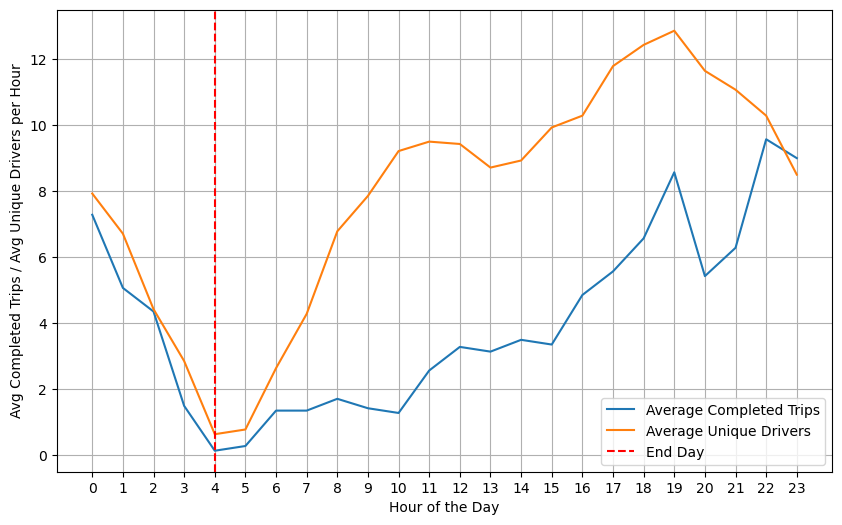

In [23]:
plt.figure(figsize = (10,6))
plt.plot(avg_hourly_completed_trips, label = 'Average Completed Trips')
plt.plot(avg_hourly_unique_drivers, label = 'Average Unique Drivers')

# mark the hour with lowest demand and supply

plt.axvline(x = hour_lowest_demand_supply, color = 'red', linestyle = '--', label = 'End Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Avg Completed Trips / Avg Unique Drivers per Hour')
plt.legend()
plt.grid(True)
plt.xticks(range(24))
plt.show()

## SUMMARY:
#### By following these steps, you will be able to:

Understand the dataset structure and quality.

Clean and prepare data for analysis.

Aggregate and summarize data to answer key questions.

Use rolling windows to detect trends.

Parse and analyze time intervals.

Calculate meaningful statistics like percentages and weighted averages.

Visualize data to uncover patterns and validate assumptions.

Identify critical time periods for supply and demand.